In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('IRIS.csv')
dataset.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [3]:
dataset['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
new_data = dataset.drop(columns=['species'])
new_data.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


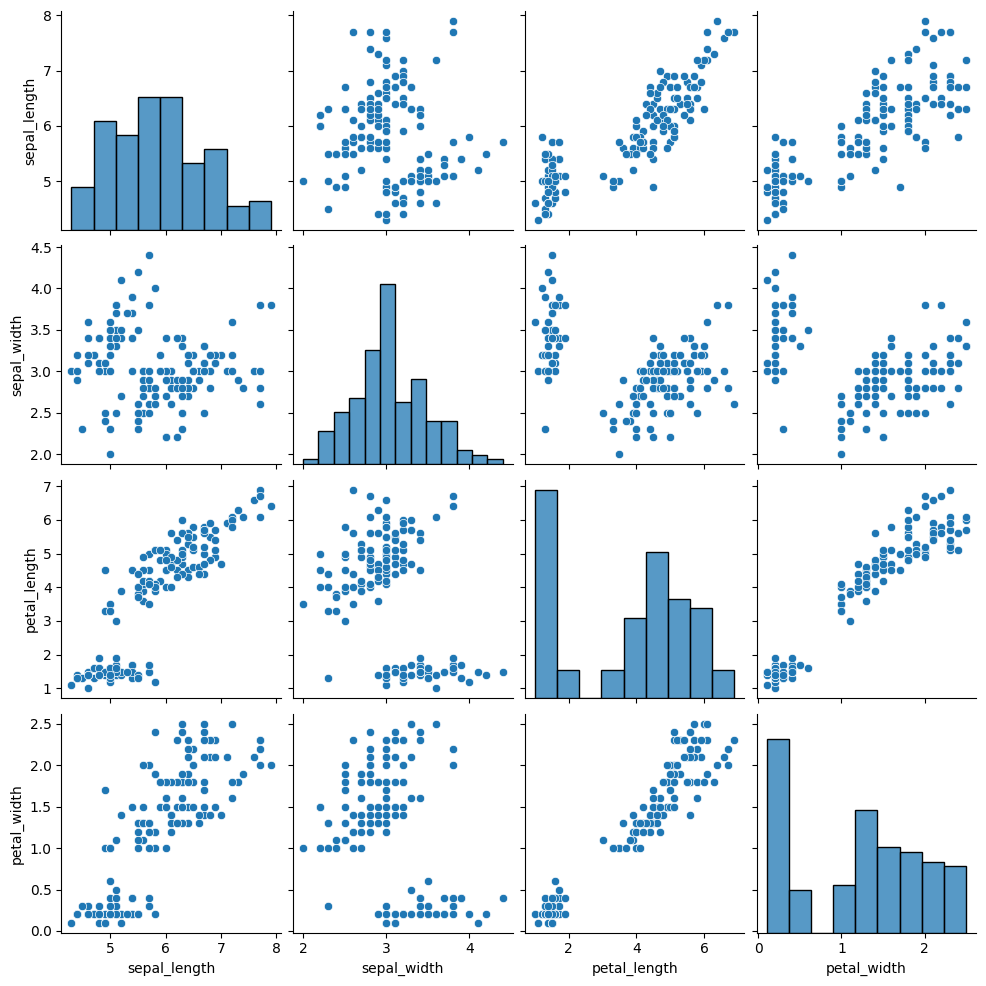

In [5]:
sns.pairplot(data=new_data)
plt.show()

In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss = []
for i in range(2,21):
    km = KMeans(n_clusters=i,init='k-means++')
    km.fit(new_data)
    wcss.append(km.inertia_)

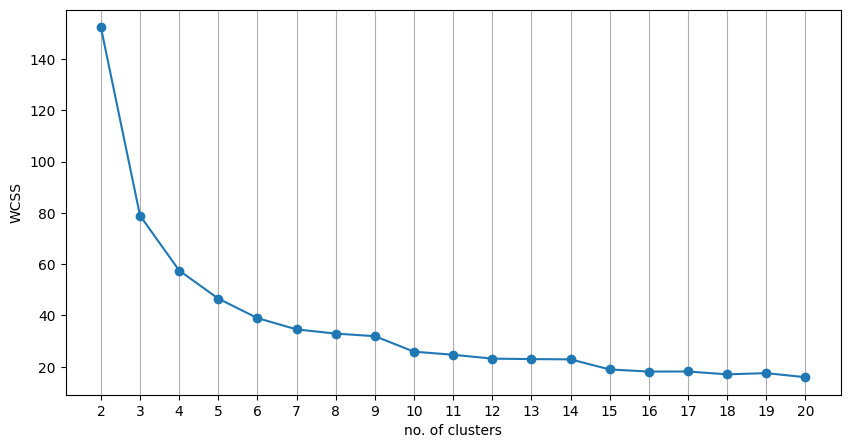

In [8]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(2,21)], wcss, marker='o')
plt.xlabel('no. of clusters')
plt.xticks([i for i in range(2,21)])
plt.ylabel('WCSS')
plt.grid(axis='x')
plt.show() #output show that 3 is the elbow point thus the best number for clusters

In [9]:
kmn = KMeans(n_clusters=3)
new_data['Predict'] = kmn.fit_predict(new_data)
new_data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,Predict
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


In [14]:
from sklearn.metrics import silhouette_score

In [13]:
kmn.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [16]:
silhouette_score(new_data, labels=kmn.labels_)*100

68.49364629960382

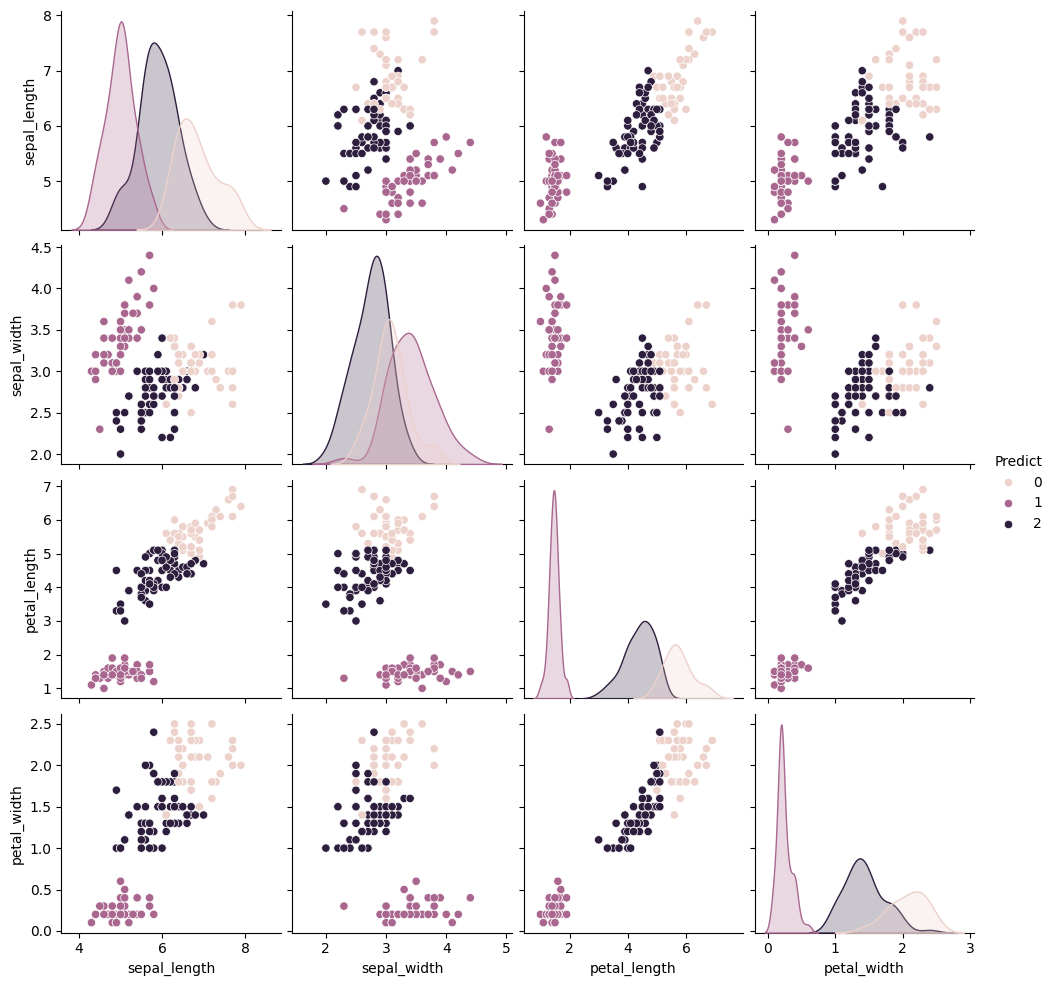

In [10]:
sns.pairplot(data=new_data, hue='Predict')
plt.savefig('Clustering_Clustered.jpg')
plt.show()

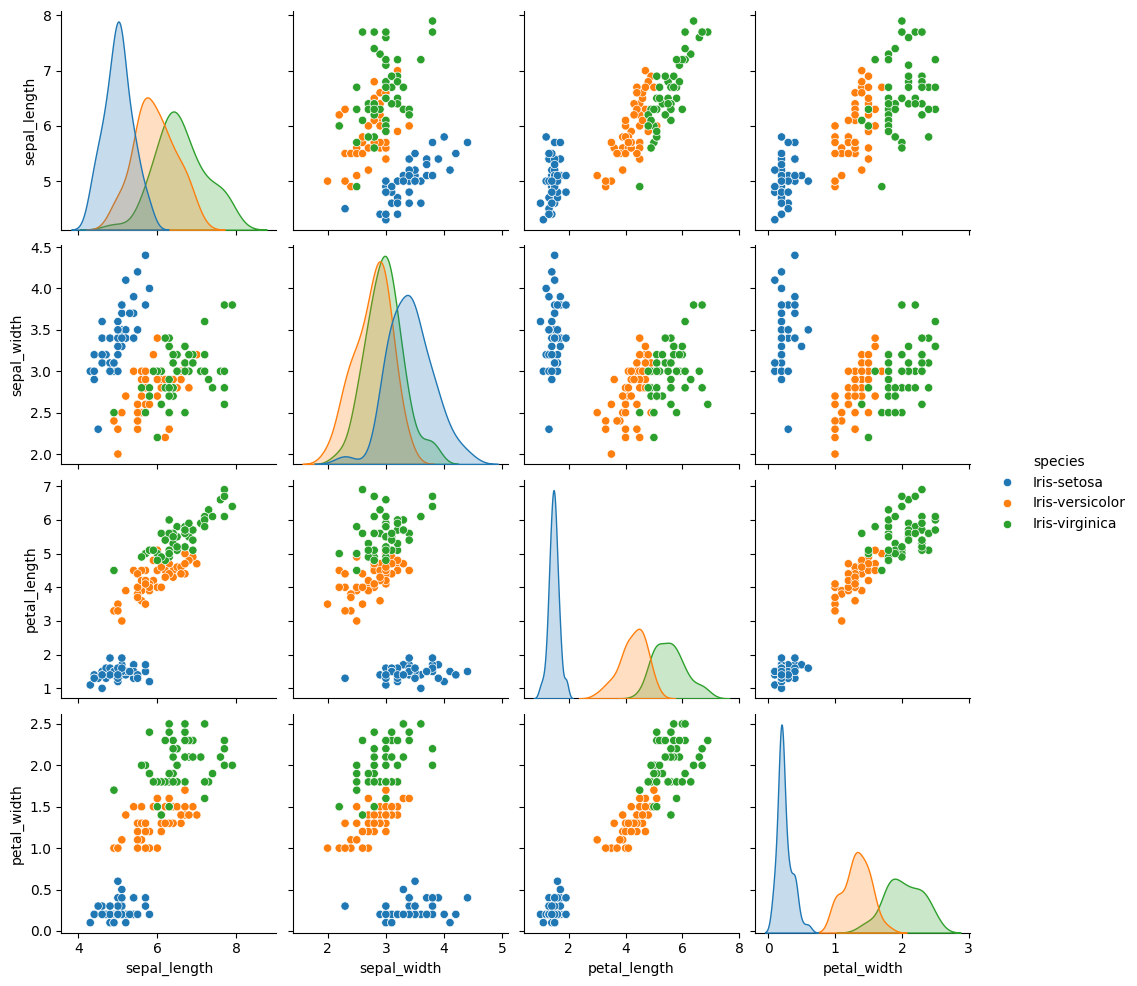

In [11]:
sns.pairplot(data=dataset, hue='species')
plt.savefig('Clusterting_org_graph.jpg')
plt.show()

In [18]:
ss = []
no_c = [j for j in range(2,21)]
for i in range(2,21):
    km1 = KMeans(n_clusters=i)
    km1.fit(new_data)
    ss.append(silhouette_score(new_data, km1.labels_))

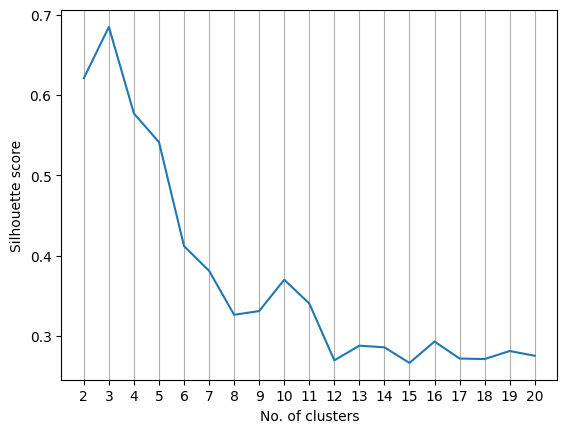

In [21]:
plt.plot(no_c, ss)
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette score')
plt.xticks(no_c)
plt.grid(axis='x')
plt.show()